---
# Feature Engineering Techniques
---

## Standardization:

This is a type of Feature Engineering that transforms data into a standard deviation-based scale. It is also known as Z-score Normalization, as it measures how far an observation is from the mean as a factor of Standard Deviation.

### Formula:

### $X'_i = \frac{x_i - \bar{x}}{\sigma}$

- $X'_i$ = Z-Score (Distance based measure from Mean as a factor of Std)
- xi = Each Value
- $\bar{x}$ = Mean
- $\sigma$ = Standard Deviation

### How it Works:

- Mean-Centering: Subtracts the mean to shift data so that its new mean becomes 0.
- Scaling: Divides by the standard deviation to make the distribution’s spread equal to 1.
- Result: A transformed dataset where all values are expressed in terms of standard deviations from the mean.

### Why Use Z-Score Normalization?

- Helps normalize features for machine learning models that rely on distance-based computations (e.g., KNN, SVM, PCA).
- Ensures that features with different scales contribute equally.
- Useful for outlier detection, as extreme values will have very high or very low Z-scores.

This technique is also referred to as Mean Centering and Scaling by the Standard Deviation because it shifts the mean to the origin and compresses all values relative to one standard deviation from the mean.

---

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
df = pd.read_csv('./data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [52]:
df = df.loc[:, ['Age', 'EstimatedSalary', 'Purchased']]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Purchased', axis=1), df['Purchased'], test_size=.20, random_state=10
)

display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(320, 2)

(320,)

(80, 2)

(80,)

In [54]:
# Train the StandardScalar using X_train
scaler = StandardScaler()

scaler = scaler.fit(X_train)

scaler.mean_, scaler.var_

(array([3.736250e+01, 6.984375e+04]), array([1.10412344e+02, 1.16330684e+09]))

In [55]:
# Transform the Data train/test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# It returns a numpy array, so change it back to DataFrame.

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [56]:
# Check the top rows
X_train_scaled.head(), X_test_scaled.head()

(        Age  EstimatedSalary
 0 -0.034498         0.268454
 1  0.060670        -0.259292
 2 -1.652355         0.121858
 3 -0.986179         0.532328
 4 -1.366851        -1.226827,
         Age  EstimatedSalary
 0  0.441342        -0.142015
 1 -0.034498         0.033900
 2  0.441342         0.590966
 3  0.917182        -0.669762
 4 -1.366851        -0.640442)

In [57]:
# Check if the scaling is done correctly.
# Mean should be aprox 0 for both features
# Std should be aprox 1 for both features
print(np.round(X_train_scaled.describe().T, 2))
print(np.round(X_test_scaled.describe().T, 2))

                 count  mean  std   min   25%   50%   75%   max
Age              320.0   0.0  1.0 -1.84 -0.80 -0.08  0.82  2.15
EstimatedSalary  320.0   0.0  1.0 -1.61 -0.79  0.02  0.53  2.35
                 count  mean   std   min   25%   50%   75%   max
Age               80.0  0.14  0.98 -1.65 -0.49  0.06  0.85  2.06
EstimatedSalary   80.0 -0.01  1.00 -1.61 -0.74 -0.24  0.50  2.23


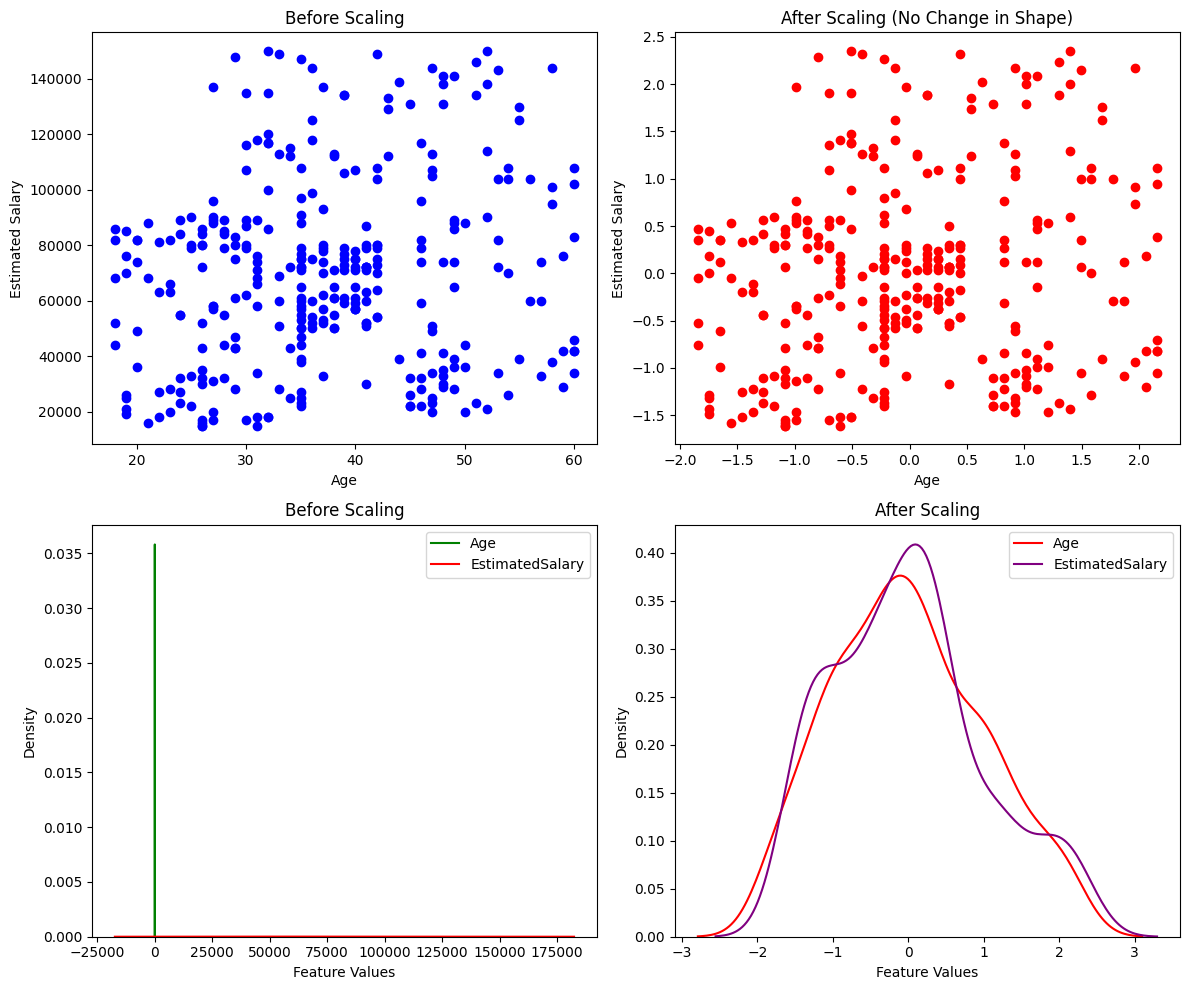

In [58]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

ax1, ax2, ax3, ax4 = axes.flatten()

ax1.scatter(x = X_train['Age'], y = X_train['EstimatedSalary'], color='blue')
ax1.set_title('Before Scaling')
# Set x and y axis label
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')

ax2.scatter(x = X_train_scaled['Age'], y = X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling (No Change in Shape)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')

sns.kdeplot(X_train['Age'], ax = ax3, label="Age", color="green")
sns.kdeplot(X_train['EstimatedSalary'], label="EstimatedSalary", ax = ax3, color="red")
# Set x and y axis label
ax3.set_title('Before Scaling')
ax3.set_xlabel('Feature Values')
ax3.set_ylabel('Density')
ax3.legend()

sns.kdeplot(X_train_scaled['Age'], ax = ax4, color="red", label="Age")
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax4, color="purple", label="EstimatedSalary")
# Set x and y axis label
ax4.set_title('After Scaling')
ax4.set_xlabel('Feature Values')
ax4.set_ylabel('Density')
ax4.legend()
# Display legend for ax4

plt.tight_layout()
plt.show()

In the top row of before and after graphs, we can observe that the orientation of the distribution of data doesn't change, but observe the scales differences. The graph on the top right shows mean is 0.0 for both X and Y axis.

In the PDF (Probability Density Function) in the lower-left side that there is huge difference between Age and Estimated Salary. Spread of Estimated Salary is huge on the X axis, while Sread of Age is not that much. While on the lower-right after scaling both the values are scalled near to each others and can be compared together in a more logical way. Scallig data in some of the ML algorithms are crucial to achieve better results.

### On Which Algorithms we should apply standardization.

- K-Mean
- K-Nearest-Neighbours (KNN)
- Principal Component Analysis (PCA)
- Artificial Neural Networks (ANN)
- Gradient Descent